In [5]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
data = pd.read_excel('../data/Ventas_Videojuegos.xlsx')
data.head()

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
data.shape

(16326, 10)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         16326 non-null  object 
 1   Plataforma     16326 non-null  object 
 2   Año            16326 non-null  int64  
 3   Genero         16326 non-null  object 
 4   Editorial      16290 non-null  object 
 5   Ventas NA      16326 non-null  float64
 6   Ventas EU      16326 non-null  float64
 7   Ventas JP      16326 non-null  float64
 8   Ventas Otros   16326 non-null  float64
 9   Ventas Global  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [14]:
# data.describe()

In [ ]:
# data.describe(include=['object', 'bool'])

In [15]:
data.isnull().sum()

Nombre            0
Plataforma        0
Año               0
Genero            0
Editorial        36
Ventas NA         0
Ventas EU         0
Ventas JP         0
Ventas Otros      0
Ventas Global     0
dtype: int64

# 1. Que generos son las mas populares

In [18]:
data['Genero'].value_counts()

Genero
Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       850
Fighting         836
Strategy         671
Puzzle           571
Name: count, dtype: int64

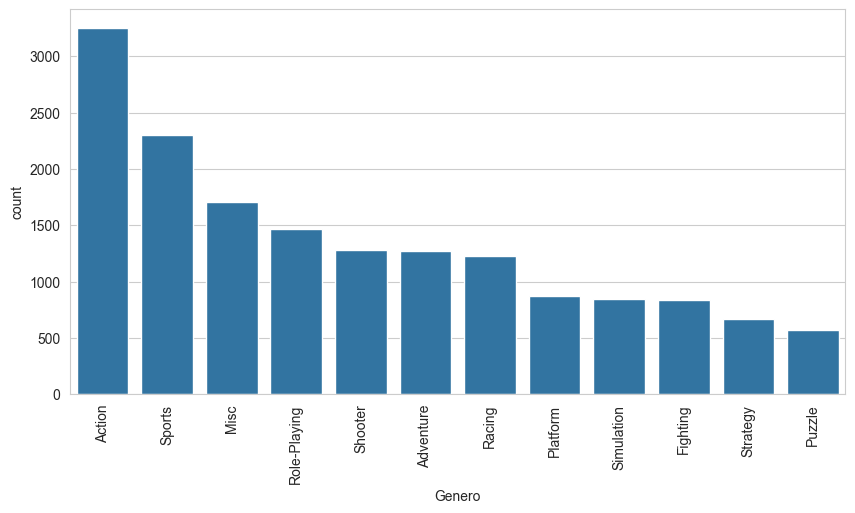

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Genero", data=data, order = data['Genero'].value_counts().index);
plt.xticks(rotation=90);

* vemos que las personas prefieren mas los juegos de accción y de deportes +3000 y +2000 respectivamente

# 2. Cual es el año en que mas salieron juegos?

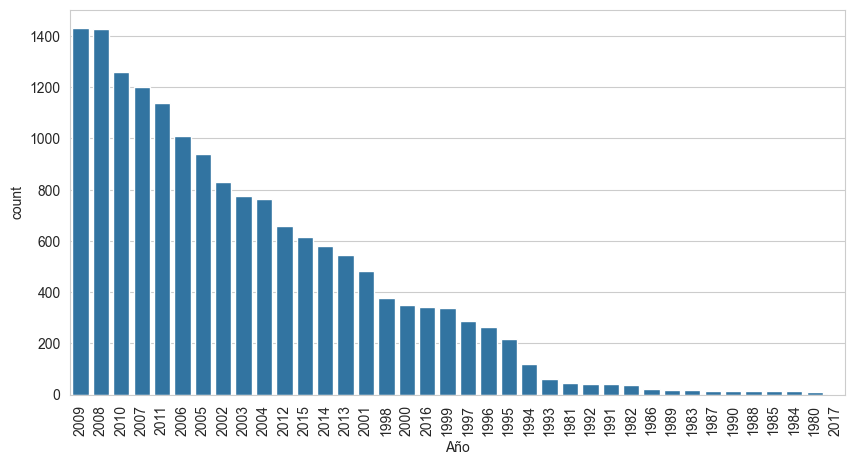

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Año", data=data, order = data.groupby(by=['Año'])['Nombre'].count().sort_values(ascending=False).index);
plt.xticks(rotation=90);

### el topo de años con mas titulos publicados:
1. 2009.0  ->  1431
1. 2008.0  ->  1428
1. 2010.0  ->  1259
1. 2007.0  ->  1202
1. 2011.0  ->  1139

los años donde estuvieron mas pupulares los juegos fue entre el 2008 y 2010

# 3. Top 5 de juegos lanzados por genero

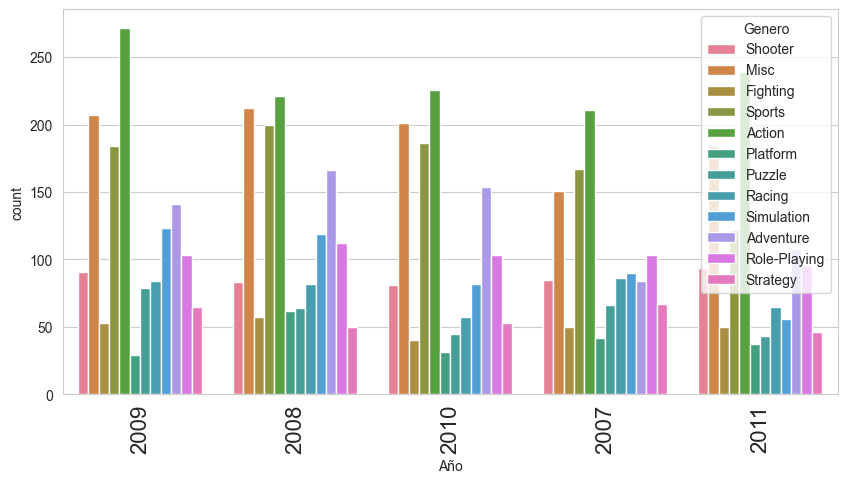

In [28]:
plt.figure(figsize=(10, 5));
sns.countplot(x="Año", data=data, hue='Genero', order=data["Año"].value_counts().iloc[:5].index);
plt.xticks(size=16, rotation=90);

* Los juegos de acción siempre estan en el top

# 4. Que años tuvieron las mayores ventas a nivel mundial?

In [31]:
data_Año = data.groupby(by=['Año'])['Ventas Global'].sum()
data_Año = data_Año.reset_index()
# data_Año.sort_values(by=['Ventas Global'], ascending=False)

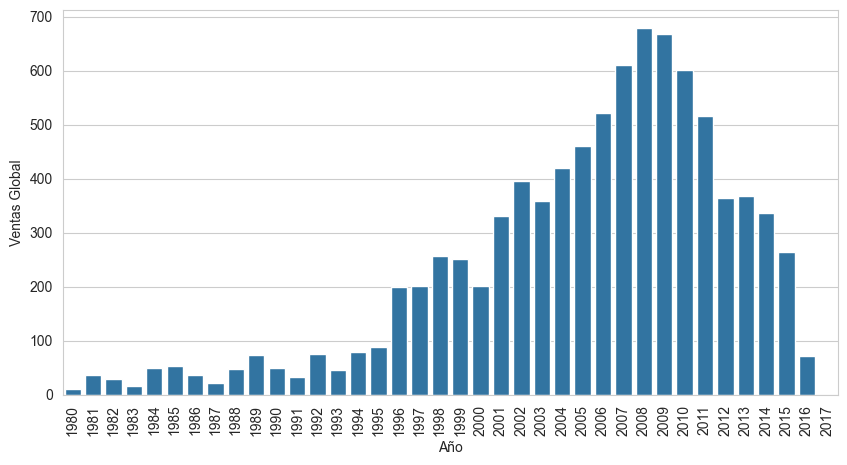

In [35]:
plt.figure(figsize=(10, 5));
sns.barplot(x="Año", y="Ventas Global", data=data_Año);
plt.xticks(rotation=90);

### Años con mayor numero de ventas
1. 2008.0 	678.90
1. 2009.0 	667.30
1. 2007.0 	611.13
1. 2010.0 	600.45
1. 2006.0 	521.04

* El año 2006 no estuvo en el top 5 de lanzamientos pero si estuvo en el top 5 de mayores ventas 

# 5. Cual fue el genero que tuvo mayor lanzamientos por cada año

In [36]:
Año_max_df = data.groupby(['Año', 'Genero']).size().reset_index(name='count')
Año_max_idx = Año_max_df.groupby(['Año'])['count'].transform(max) == Año_max_df['count']
Año_max_Genero = Año_max_df[Año_max_idx].reset_index(drop=True)
Año_max_Genero = Año_max_Genero.drop_duplicates(subset=["Año", "count"], keep='last').reset_index(drop=True)
# Año_max_Genero

C:\Users\IvanJoseLaverdeMesa\AppData\Local\Temp\ipykernel_25292\492556799.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  year_max_idx = year_max_df.groupby(['Año'])['count'].transform(max) == year_max_df['count']


In [37]:
Genero = Año_max_Genero['Genero'].values
# Genero[0]

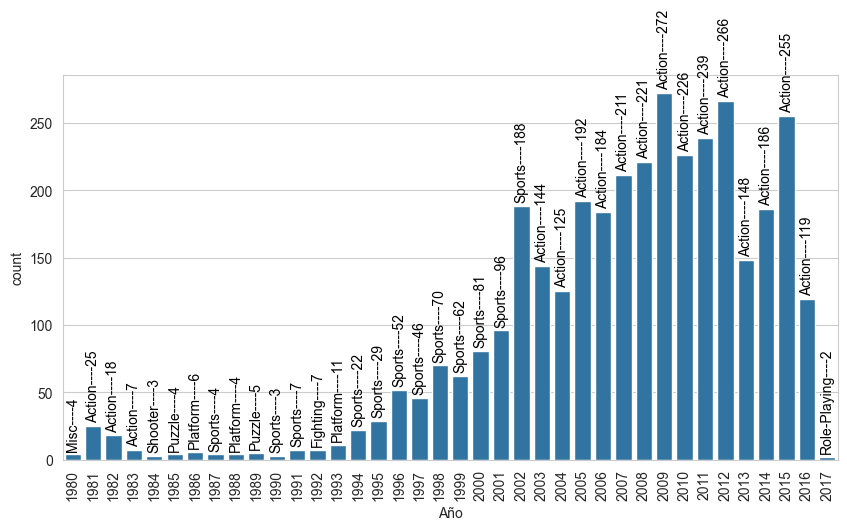

In [39]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x='Año', y='count', data=Año_max_Genero)
index = 0
for value in Año_max_Genero['count'].values:
#     print(asd)
    g.text(index, value + 5, str(Genero[index] + '----' +str(value)), color='#000', size=10, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

### En 2009 Acción ---> 272 y 2012 Acción ---> 266 juegos lanzados.

# 6. Que genero de juego fue el que más se vendio por año?

In [40]:
Año_sale_dx = data.groupby(by=['Año', 'Genero'])['Ventas Global'].sum().reset_index()
Año_sale = Año_sale_dx.groupby(by=['Año'])['Ventas Global'].transform(max) == Año_sale_dx['Ventas Global']
Año_sale_max = Año_sale_dx[Año_sale].reset_index(drop=True)
# Año_sale_max

C:\Users\IvanJoseLaverdeMesa\AppData\Local\Temp\ipykernel_25292\2799775373.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  year_sale = year_sale_dx.groupby(by=['Año'])['Ventas Global'].transform(max) == year_sale_dx['Ventas Global']


In [41]:
Genero = Año_sale_max['Genero']

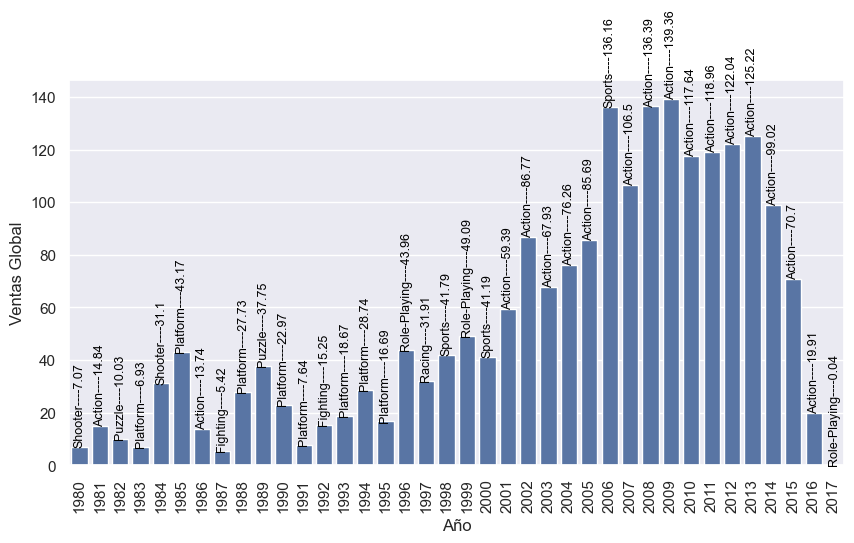

In [59]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x='Año', y='Ventas Global', data=Año_sale_max)
index = 0
for value in Año_sale_max['Ventas Global']:
    g.text(index, value + 1, str(Genero[index] + '----' +str(round(value, 2))), color='#000', size=9, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

* 2009 Acción ---> 139.36 millones y 2008 Acción ---> 136.39 millones .

# 7. Que genero de juego tiene el mayor precio de ventas a nivel mundial

In [43]:
data_Genero = data.groupby(by=['Genero'])['Ventas Global'].sum()
data_Genero = data_Genero.reset_index()
data_Genero = data_Genero.sort_values(by=['Ventas Global'], ascending=False)
# data_Genero

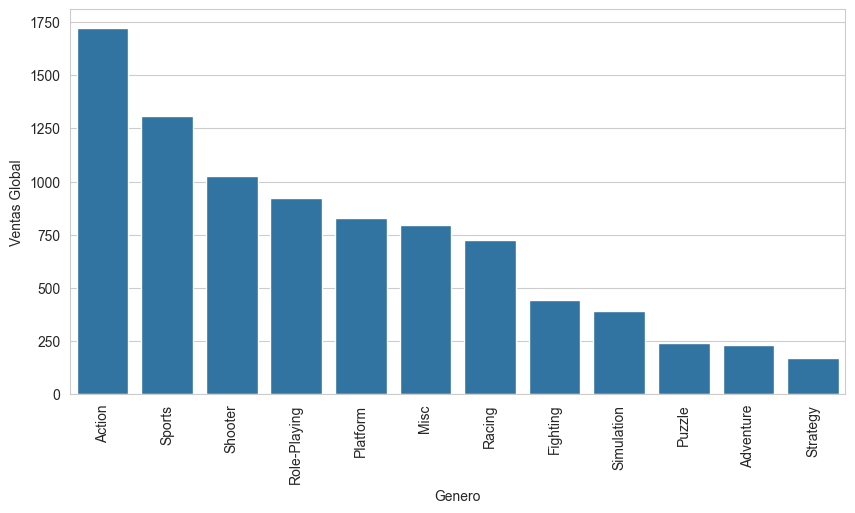

In [46]:
plt.figure(figsize=(10, 5));
sns.barplot(x="Genero", y="Ventas Global", data=data_Genero);
plt.xticks(rotation=90);

* Acción y Deportes siempre estan en el top. En tercer lugar estan los de  "Shooter"

# 8. Que plataformas tienen las ventas globales más altas

In [47]:
data_Plataforma = data.groupby(by=['Plataforma'])['Ventas Global'].sum()
data_Plataforma = data_Plataforma.reset_index()
data_Plataforma = data_Plataforma.sort_values(by=['Ventas Global'], ascending=False)
# data_Plataforma

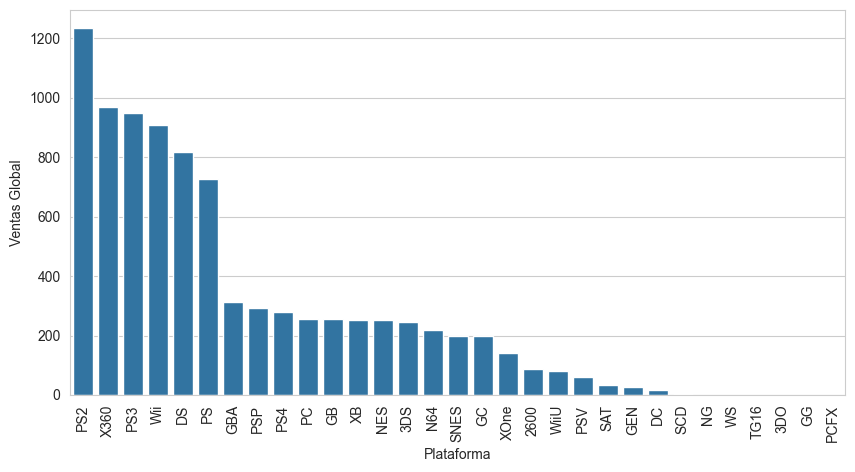

In [49]:
plt.figure(figsize=(10, 5));
sns.barplot(x="Plataforma", y="Ventas Global", data=data_Plataforma);
plt.xticks(rotation=90);

* **La plataforma que más vende es PS2"**

# 9. Cual es el juego de mayores ventas a nivel mundial?

In [51]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Nombre', 'Año', 'Genero', 'Ventas Global']]
top_game_sale = top_game_sale.sort_values(by=['Ventas Global'], ascending=False)
# top_game_sale

In [52]:
name = top_game_sale['Nombre']
Año = top_game_sale['Año']
y = np.arange(0, 20)

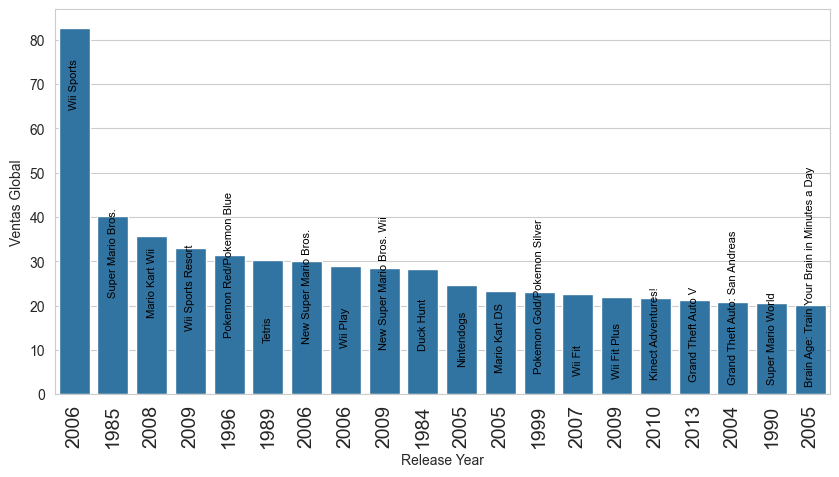

In [55]:
plt.figure(figsize=(10, 5));
g = sns.barplot(x='Nombre', y='Ventas Global', data=top_game_sale);
index = 0
for value in top_game_sale['Ventas Global']:
    g.text(index, value - 18, name[index], color='#000', size=8, rotation= 90, ha="center");
    index += 1

plt.xticks(y, top_game_sale['Año'], fontsize=14, rotation=90);
plt.xlabel('Release Año');
plt.show();

* **El juego más vendido es WiiSport**

# 10. Comparación de ventas por genero

In [56]:
comp_Genero = data[['Genero', 'Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
# comp_Genero
comp_map = comp_Genero.groupby(by=['Genero']).sum()
# comp_map

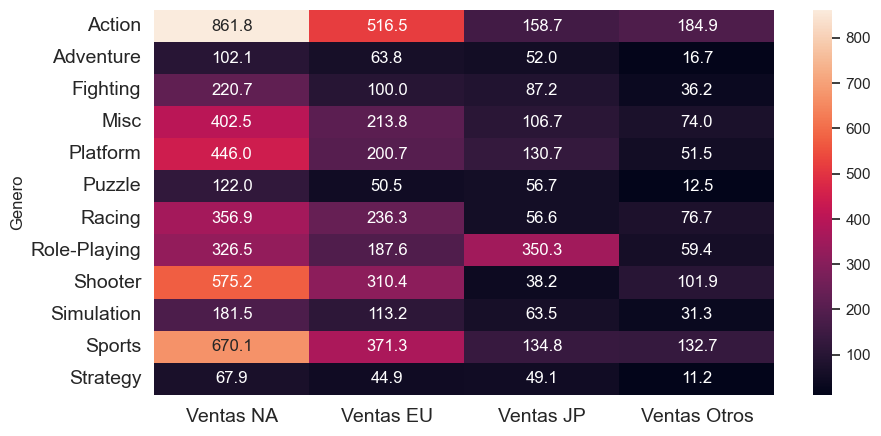

In [58]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [62]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genero'], value_vars=['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros'], var_name='Area Venta', value_name='Precio Venta')
comp_table.head()

,Genero,Area Venta,Precio Venta
0,Action,Ventas NA,861.80
1,Adventure,Ventas NA,102.06
2,Fighting,Ventas NA,220.74
3,Misc,Ventas NA,402.48
4,Platform,Ventas NA,445.99


<Axes: xlabel='Genero', ylabel='Precio Venta'>

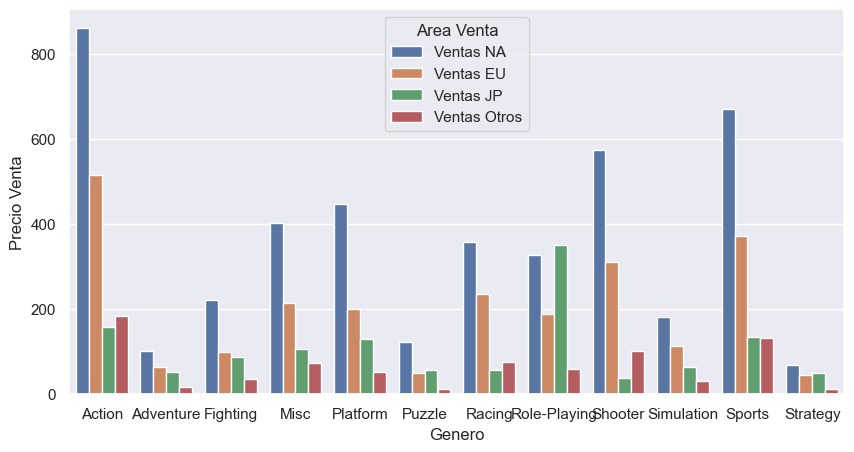

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Genero', y='Precio Venta', hue='Area Venta', data=comp_table)

* Vemos que los juegos de deportes y Shooter tienen mayores ventas comparados con los demas. Y NA tiene la mayor cantidad de ventas en el tiempo. Parece que son los mayores consumidores de video juegos

# 11. Comparación de ventas por plataforma

In [65]:
comp_Plataforma = data[['Plataforma', 'Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
comp_Plataforma.head()

,Plataforma,Ventas NA,Ventas EU,Ventas JP,Ventas Otros
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [66]:
comp_Plataforma = comp_Plataforma.groupby(by=['Plataforma']).sum().reset_index()

In [67]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_Plataforma, id_vars=['Plataforma'], value_vars=['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros'], var_name='Area Ventas', value_name='Precio Venta')
comp_table.head()

,Plataforma,Area Ventas,Precio Venta
0,2600,Ventas NA,80.78
1,3DO,Ventas NA,0.00
2,3DS,Ventas NA,78.03
3,DC,Ventas NA,5.43
4,DS,Ventas NA,388.29


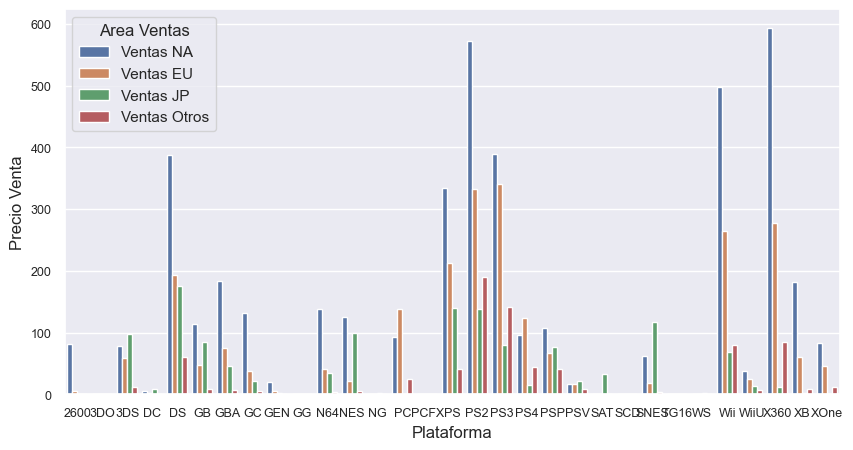

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Plataforma', y='Precio Venta', hue='Area Ventas', data=comp_table)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

* Esto muestra claramente que X360,Wii y PS2, son lideres en el mercado y siempre Norte Americano esta en el Top

# 12. Top 20 de juegos publiados

In [72]:
top_Editorial = data.groupby(by=['Editorial'])['Año'].count().sort_values(ascending=False).head(20)
top_Editorial = pd.DataFrame(top_Editorial).reset_index()
# top_Editorial

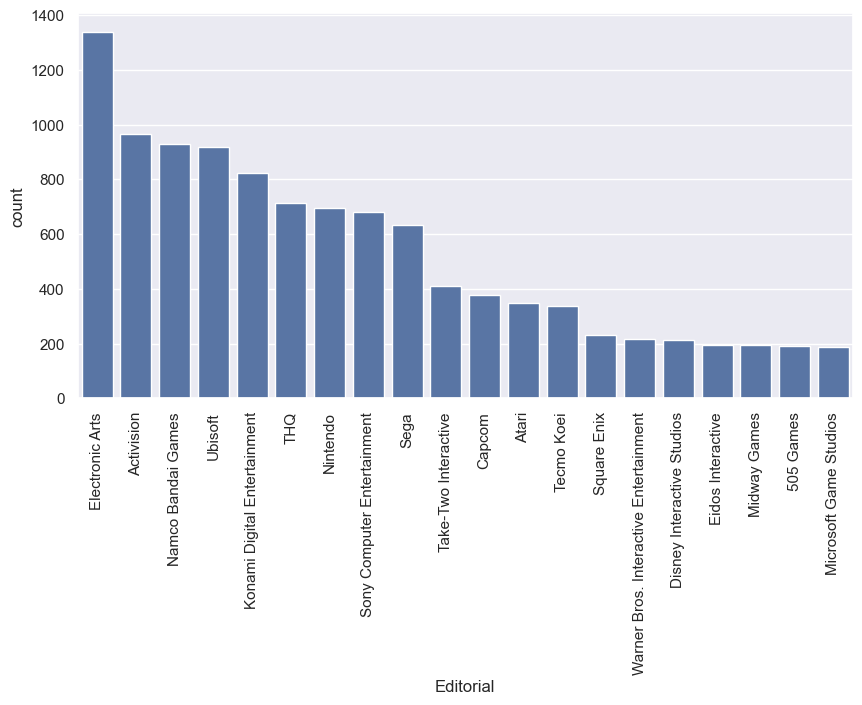

In [74]:
plt.figure(figsize=(10, 5));
sns.countplot(x="Editorial", data=data, order = data.groupby(by=['Editorial'])['Año'].count().sort_values(ascending=False).iloc[:20].index);
plt.xticks(rotation=90);

# 13. Ventas globales por Editor

In [75]:
sale_pbl = data[['Editorial', 'Ventas Global']]
sale_pbl = sale_pbl.groupby('Editorial')['Ventas Global'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

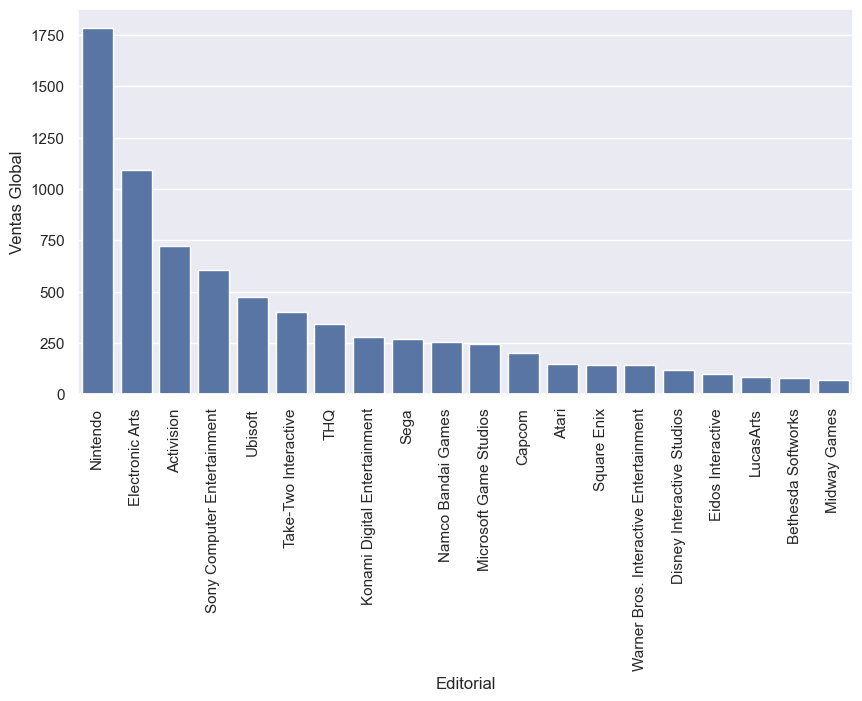

In [77]:
plt.figure(figsize=(10, 5));
sns.barplot(x='Editorial', y='Ventas Global', data=sale_pbl);
plt.xticks(rotation=90);

* Nintendo gana más que otros. donde respectivamente no se lanzan muchos juegos.
* Hasta ahora Nintendo ha lanzado 696 juegos, Pero no están en el top 5 Editorial


# 14. comparación por editorial

In [79]:
comp_Editorial = data[['Editorial', 'Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros', 'Ventas Global']]
comp_Editorial.head()

,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
comp_Editorial = comp_Editorial.groupby(by=['Editorial']).sum().reset_index().sort_values(by=['Ventas Global'], ascending=False)
comp_Editorial = comp_Editorial.head(20)
# comp_Editorial

In [81]:
comp_Editorial = pd.melt(comp_Editorial, id_vars=['Editorial'], value_vars=['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros'], var_name='Ventas Area', value_name='Precio Venta')
comp_Editorial

,Editorial,Ventas Area,Precio Venta
0,Nintendo,Ventas NA,815.75
1,Electronic Arts,Ventas NA,584.22
2,Activision,Ventas NA,426.01
3,Sony Computer Entertainment,Ventas NA,265.22
4,Ubisoft,Ventas NA,252.54
...,...,...,...
75,Disney Interactive Studios,Ventas Otros,13.15
76,Eidos Interactive,Ventas Otros,7.90
77,LucasArts,Ventas Otros,10.28
78,Bethesda Softworks,Ventas Otros,10.10


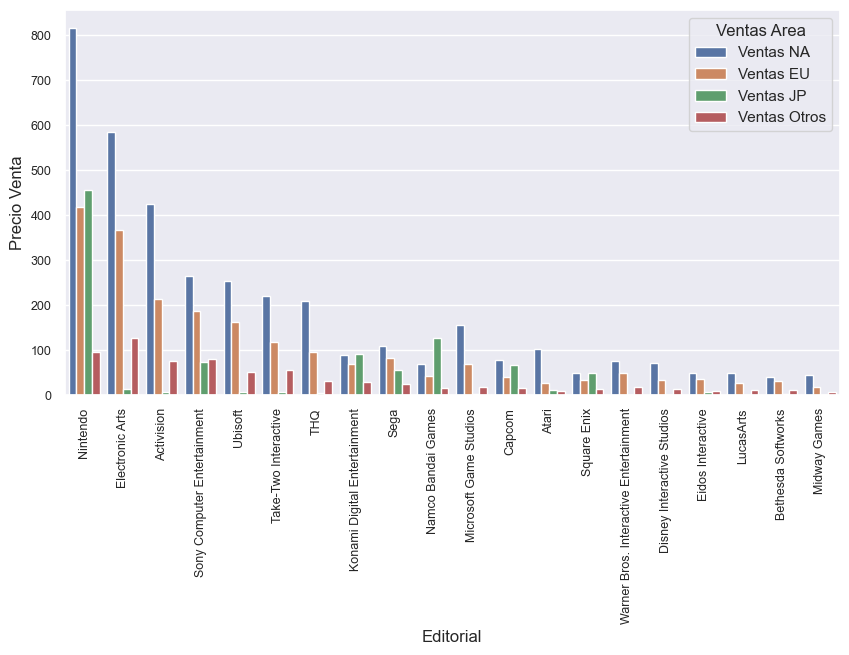

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Editorial', y='Precio Venta', hue='Ventas Area', data=comp_Editorial)
plt.xticks(fontsize=9, rotation=90)
plt.yticks(fontsize=9)
plt.show()

# 15. Top de editoriales por recuento anual

In [84]:
top_Editorial =  data[['Año', 'Editorial']]
top_Editorial_df = top_Editorial.groupby(by=['Año', 'Editorial']).size().reset_index(name='Count')
top_Editorial_idx =  top_Editorial_df.groupby(by=['Año'])['Count'].transform(max) == top_Editorial_df['Count']
top_Editorial_count = top_Editorial_df[top_Editorial_idx].reset_index(drop=True)
top_Editorial_count  = top_Editorial_count.drop_duplicates(subset=["Año", "Count"], keep='last').reset_index(drop=True)
# top_Editorial_count

C:\Users\IvanJoseLaverdeMesa\AppData\Local\Temp\ipykernel_25292\1896288979.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  top_Editorial_idx =  top_Editorial_df.groupby(by=['Año'])['Count'].transform(max) == top_Editorial_df['Count']


In [85]:
Editorial= top_Editorial_count['Editorial']

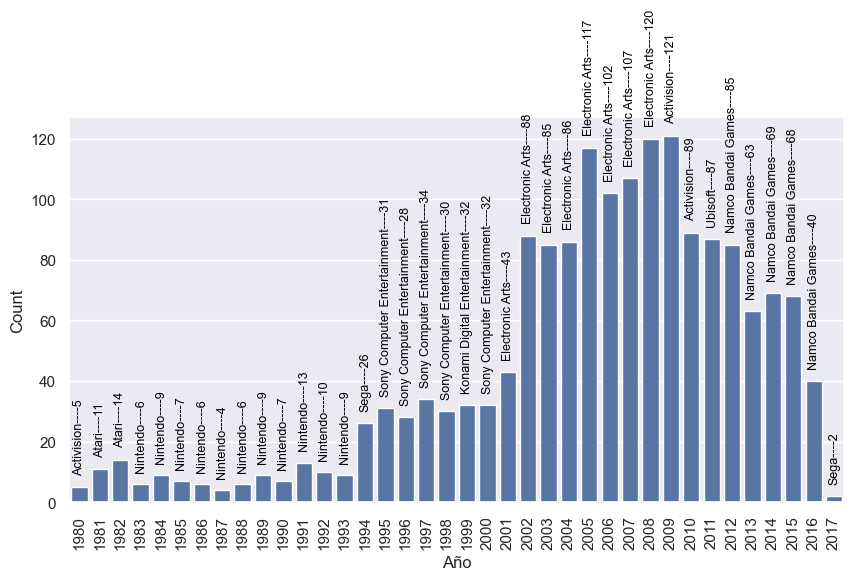

In [86]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x='Año', y='Count', data=top_Editorial_count)
index = 0
for value in top_Editorial_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(Editorial[index] + '----' +str(value)), color='#000', size=9, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 16. Ingresos totales por región

In [87]:
top_sale_reg = data[['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,Ventas NA,4333.16
1,Ventas EU,2409.12
2,Ventas JP,1284.31
3,Ventas Otros,788.99


<Axes: xlabel='region', ylabel='sale'>

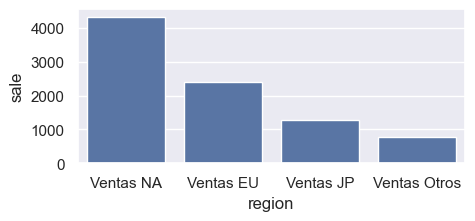

In [91]:
plt.figure(figsize=(5, 2))
sns.barplot(x='region', y='sale', data = top_sale_reg)

### pie chart of region sale

In [92]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

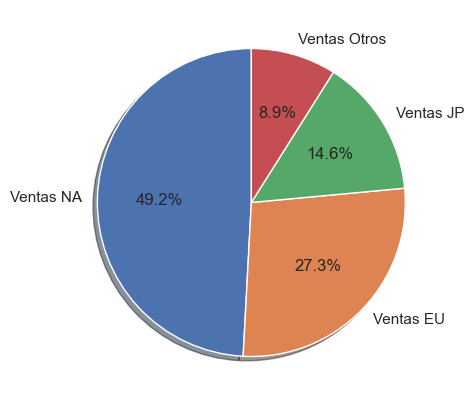

In [96]:
plt.figure(figsize=(10, 5));
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90);

Norte America cubre casi el 50% de las ventas.

# 17. Histograma de Ventas

C:\Users\IvanJoseLaverdeMesa\AppData\Local\Temp\ipykernel_25292\1028810477.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=5, kde=False, fit=stats.gamma);


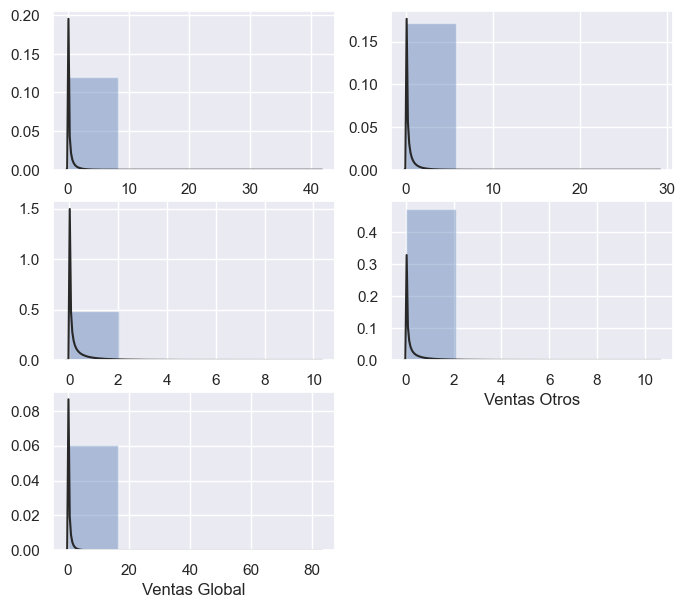

In [104]:
# sns.distplot(data['Ventas NA'],  kde=False, fit=stats.gamma);
# sns.distplot(data['Ventas EU'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(8,7));
sales_columns = ['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros', 'Ventas Global']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1);
    sns.distplot(data[column], bins=5, kde=False, fit=stats.gamma);

## Distribución después de la transformación de registros

In [105]:
data_hist_log = data.copy()

In [107]:
data_hist_log = data_hist_log[data_hist_log['Ventas NA'] != 0]
data_hist_log = data_hist_log[data_hist_log['Ventas EU'] != 0]
data_hist_log = data_hist_log[data_hist_log['Ventas Otros'] != 0]
data_hist_log = data_hist_log[data_hist_log['Ventas JP'] != 0]
data_hist_log = data_hist_log[data_hist_log['Ventas Global'] != 0]


C:\Users\IvanJoseLaverdeMesa\AppData\Local\Temp\ipykernel_25292\89829141.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma);


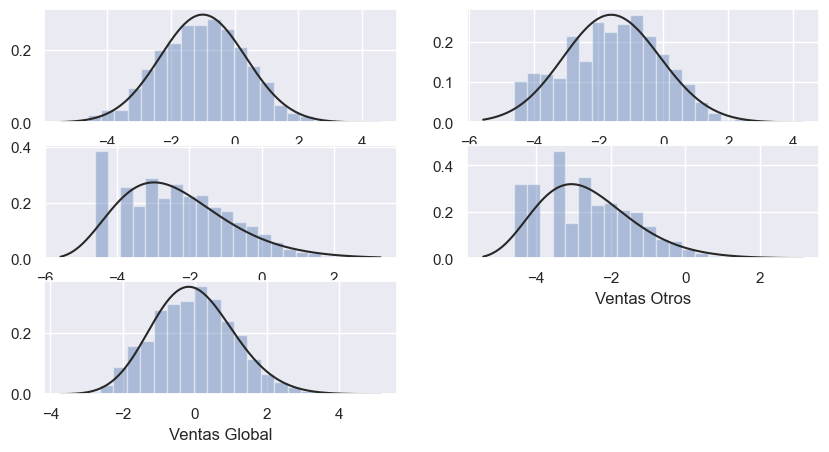

In [109]:
plt.figure(figsize=(10,5));
sales_columns = ['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros', 'Ventas Global']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1);
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma);

* Podemos ver la simetria y tendencia central. Casi todos los datos están asimétricos a la derecha y simétricos después de la transformación logaritmica

# 18. Relación de columnas

## Mapa de Calor

**Es una buena forma de entender la correlación entre columnas.**

In [114]:
data.select_dtypes(include=['int64', 'float64'])

,Año,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,2006,41.49,29.02,3.77,8.46,82.74
1,1985,29.08,3.58,6.81,0.77,40.24
2,2008,15.85,12.88,3.79,3.31,35.82
3,2009,15.75,11.01,3.28,2.96,33.00
4,1996,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16321,2016,0.00,0.01,0.00,0.00,0.01
16322,2016,0.00,0.01,0.00,0.00,0.01
16323,2016,0.00,0.00,0.01,0.00,0.01
16324,2017,0.00,0.00,0.01,0.00,0.01


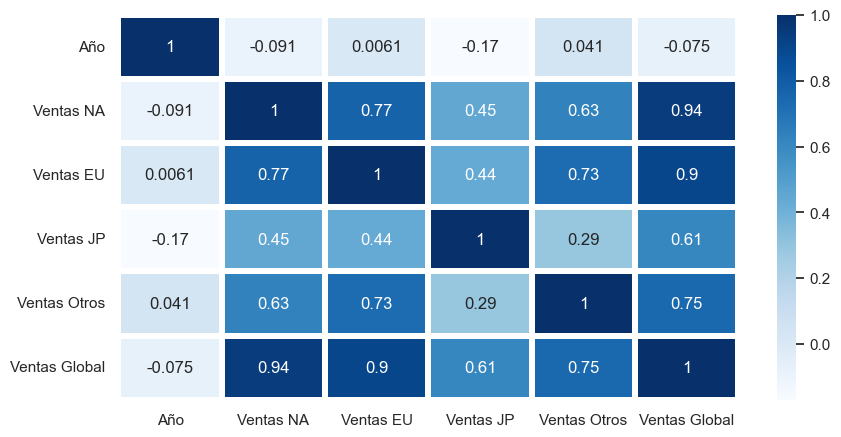

In [116]:
plt.figure(figsize=(10,5));
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), cmap = "Blues", annot=True, linewidth=3);

**Podemos ver que las ventyas en Norte America y en la Union Europea tienen correlación con las ventas Globales**